In [1]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
from plotly.subplots import make_subplots
import plotly.io as pio
import warnings
warnings.filterwarnings('ignore')
pio.renderers
from pandas_datareader import data as web 

from datetime import datetime as dt
from datetime import timedelta

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures

import statsmodels.api as sm
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller



In [2]:
covid= pd.read_csv("cleaned_data.csv")
covid.head()

,Continent,Location,Date,Total_Cases,New_Cases,New cases smoothed,Total_deaths,New deaths,new deaths smoothed,total cases per million,...,median age,aged 65 older,aged 70 older,extreme poverty,cardiovasc death rate,diabetes prevalence,female smokers,male smokers,hospital beds per thousand,life expectancy
0,Asia,Afghanistan,2020-02-24,5,5,0.0,1,0,0.0,0.126,...,18.6,2.581,1.337,0.2,597.029,9.59,1.9,24.7,0,64.83
1,Asia,Afghanistan,2020-02-25,5,0,0.0,1,0,0.0,0.126,...,18.6,2.581,1.337,0.2,597.029,9.59,1.9,24.7,0,64.83
2,Asia,Afghanistan,2020-02-26,5,0,0.0,1,0,0.0,0.126,...,18.6,2.581,1.337,0.2,597.029,9.59,1.9,24.7,0,64.83
3,Asia,Afghanistan,2020-02-27,5,0,0.0,1,0,0.0,0.126,...,18.6,2.581,1.337,0.2,597.029,9.59,1.9,24.7,0,64.83
4,Asia,Afghanistan,2020-02-28,5,0,0.0,1,0,0.0,0.126,...,18.6,2.581,1.337,0.2,597.029,9.59,1.9,24.7,0,64.83


In [3]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166326 entries, 0 to 166325
Data columns (total 52 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Continent                                   166326 non-null  object 
 1   Location                                    166326 non-null  object 
 2   Date                                        166326 non-null  object 
 3   Total_Cases                                 166326 non-null  int64  
 4   New_Cases                                   166326 non-null  int64  
 5   New cases smoothed                          166326 non-null  float64
 6   Total_deaths                                166326 non-null  int64  
 7   New deaths                                  166326 non-null  int64  
 8   new deaths smoothed                         166326 non-null  float64
 9   total cases per million                     166326 non-null  float64
 

In [4]:
covid.describe()

,Total_Cases,New_Cases,New cases smoothed,Total_deaths,New deaths,new deaths smoothed,total cases per million,new cases per million,total deaths per million,reproduction rate,...,median age,aged 65 older,aged 70 older,extreme poverty,cardiovasc death rate,diabetes prevalence,female smokers,male smokers,hospital beds per thousand,life expectancy
count,1.663260e+05,1.663260e+05,1.663260e+05,1.663260e+05,166326.000000,166326.000000,166326.000000,166326.000000,166326.000000,166326.000000,...,166326.000000,166326.000000,166326.000000,166326.000000,166326.000000,166326.000000,166326.000000,166326.000000,166326.000000,166326.000000
mean,2.489799e+06,1.134871e+04,1.120568e+04,5.042698e+04,149.695496,148.861789,29534.447829,162.478031,469.268518,1.005646,...,30.881670,8.432797,5.098238,7.537607,241.129102,7.431829,7.464510,29.780033,1.882857,73.795951
std,1.529680e+07,8.362675e+04,8.130804e+04,2.831654e+05,780.429560,760.934729,51261.187951,675.336248,739.109557,0.320315,...,8.314542,5.609018,3.916110,16.253403,116.191277,4.625252,9.416871,11.412362,2.403957,7.284937
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,-0.080000,...,15.100000,1.144000,0.526000,0.100000,79.370000,0.990000,0.100000,7.700000,0.000000,53.280000
25%,1.590000e+03,0.000000e+00,4.857000e+00,2.200000e+01,0.000000,0.000000,656.276000,0.000000,25.604000,0.880000,...,24.300000,3.941000,2.322000,0.200000,152.783000,3.940000,1.900000,24.700000,0.000000,69.820000
50%,2.365700e+04,7.100000e+01,9.150000e+01,3.690000e+02,1.000000,1.143000,5157.280000,10.090500,200.763000,1.020000,...,32.400000,6.933000,3.053000,0.200000,217.066000,6.820000,1.900000,24.700000,1.000000,75.490000
75%,2.844440e+05,1.013000e+03,1.056714e+03,5.269000e+03,14.000000,14.571000,36006.992000,96.513500,576.470000,1.110000,...,37.400000,11.232000,7.049000,3.400000,303.740000,10.080000,9.700000,35.700000,3.000000,78.860000
max,4.451295e+08,4.206334e+06,3.444237e+06,5.995245e+06,18020.000000,14689.143000,706541.904000,51427.491000,6322.263000,6.140000,...,48.200000,27.049000,18.493000,77.600000,724.417000,30.530000,44.000000,78.100000,13.000000,86.750000


In [5]:
covid.head()

,Continent,Location,Date,Total_Cases,New_Cases,New cases smoothed,Total_deaths,New deaths,new deaths smoothed,total cases per million,...,median age,aged 65 older,aged 70 older,extreme poverty,cardiovasc death rate,diabetes prevalence,female smokers,male smokers,hospital beds per thousand,life expectancy
0,Asia,Afghanistan,2020-02-24,5,5,0.0,1,0,0.0,0.126,...,18.6,2.581,1.337,0.2,597.029,9.59,1.9,24.7,0,64.83
1,Asia,Afghanistan,2020-02-25,5,0,0.0,1,0,0.0,0.126,...,18.6,2.581,1.337,0.2,597.029,9.59,1.9,24.7,0,64.83
2,Asia,Afghanistan,2020-02-26,5,0,0.0,1,0,0.0,0.126,...,18.6,2.581,1.337,0.2,597.029,9.59,1.9,24.7,0,64.83
3,Asia,Afghanistan,2020-02-27,5,0,0.0,1,0,0.0,0.126,...,18.6,2.581,1.337,0.2,597.029,9.59,1.9,24.7,0,64.83
4,Asia,Afghanistan,2020-02-28,5,0,0.0,1,0,0.0,0.126,...,18.6,2.581,1.337,0.2,597.029,9.59,1.9,24.7,0,64.83


In [6]:
covid.Date = pd.to_datetime(covid.Date.astype(str), dayfirst=False, errors='coerce')
covid.Date.tail()

166321   2022-03-01
166322   2022-03-02
166323   2022-03-03
166324   2022-03-04
166325   2022-03-05
Name: Date, dtype: datetime64[ns]

In [7]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166326 entries, 0 to 166325
Data columns (total 52 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Continent                                   166326 non-null  object        
 1   Location                                    166326 non-null  object        
 2   Date                                        166326 non-null  datetime64[ns]
 3   Total_Cases                                 166326 non-null  int64         
 4   New_Cases                                   166326 non-null  int64         
 5   New cases smoothed                          166326 non-null  float64       
 6   Total_deaths                                166326 non-null  int64         
 7   New deaths                                  166326 non-null  int64         
 8   new deaths smoothed                         166326 non-null  float64      

In [8]:
#EDA and Visualization

In [9]:
#Getting the cumulative sum of all the cases reported in a day

cumulative_confirmed = covid.groupby('Date').Total_Cases.sum()
cumulative_confirmed = cumulative_confirmed.groupby(cumulative_confirmed.index.to_period('y')).cumsum().reset_index()
for i in range(298,0,-1):
    cumulative_confirmed['Total_Cases'].iloc[i] = cumulative_confirmed['Total_Cases'].iloc[i]-cumulative_confirmed['Total_Cases'].iloc[i-1]
cumulative_confirmed.head()

,Date,Total_Cases
0,2020-01-01,2
1,2020-01-02,2
2,2020-01-03,2
3,2020-01-04,3
4,2020-01-05,3


In [10]:
!pip install -U kaleido
!pip install plotly==5.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


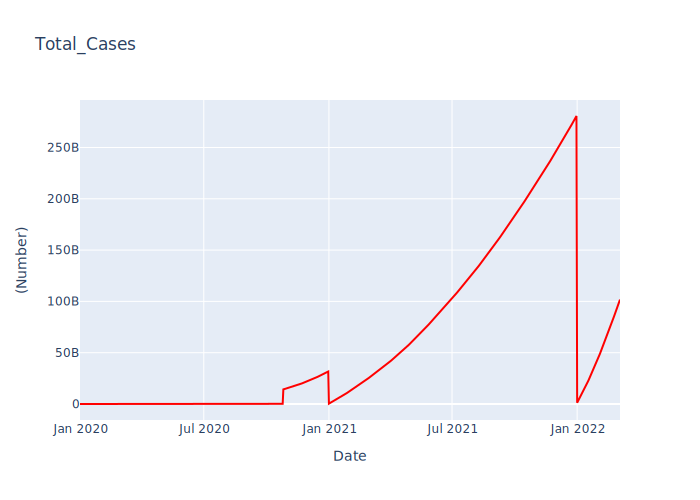

In [11]:
#Plotting a graph for the cumulative confirmed cases
confirmed_graph = go.Scatter(x=cumulative_confirmed.Date,y=cumulative_confirmed.Total_Cases, marker=dict(color='red'))
layout = go.Layout(title='Total_Cases', xaxis=dict(title='Date'), yaxis=dict(title='(Number)'))
fig = go.Figure(data=[confirmed_graph], layout=layout)
fig.update_layout()
fig.show("svg")

In [12]:
#Getting the cumulative sum of all the deaths reported in a day

cumulative_deaths = covid.groupby('Date').Total_deaths.sum()
cumulative_deaths = cumulative_deaths.groupby(cumulative_deaths.index.to_period('y')).cumsum().reset_index()
for i in range(298,0,-1):
    cumulative_deaths['Total_deaths'].iloc[i] = cumulative_deaths['Total_deaths'].iloc[i]-cumulative_deaths['Total_deaths'].iloc[i-1]
cumulative_deaths.head(10)

,Date,Total_deaths
0,2020-01-01,2
1,2020-01-02,2
2,2020-01-03,2
3,2020-01-04,3
4,2020-01-05,3
5,2020-01-06,6
6,2020-01-07,3
7,2020-01-08,3
8,2020-01-09,3
9,2020-01-10,3


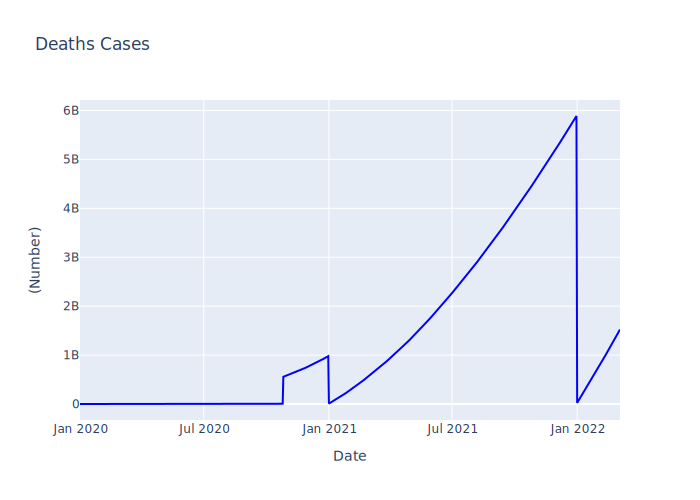

In [13]:
#Plotting a graph for the cumulative sum of deaths

death_graph = go.Scatter(x=cumulative_deaths.Date,y=cumulative_deaths.Total_deaths, marker=dict(color='blue'))
layout = go.Layout(title='Deaths Cases', xaxis=dict(title='Date'), yaxis=dict(title='(Number)'))
fig = go.Figure(data=[death_graph], layout=layout)
fig.update_layout()
fig.show(renderer="svg")

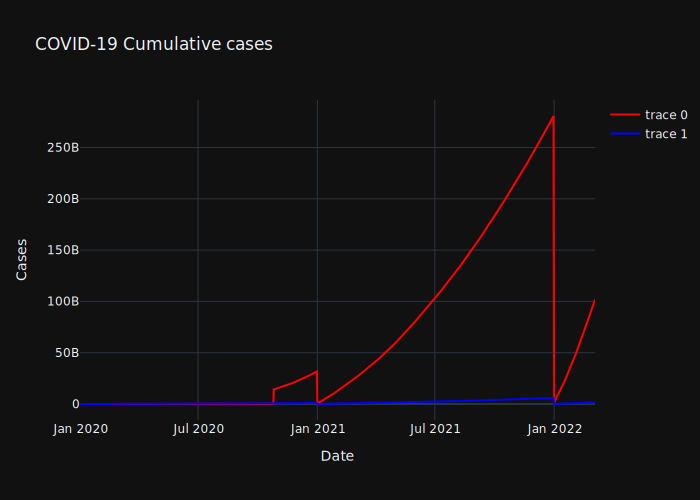

In [19]:
#Plotting a graph for all the 3 categories
confirmed_graph = go.Scatter(x=cumulative_confirmed.Date,y=cumulative_confirmed.Total_Cases, marker=dict(color='red'))

death_graph = go.Scatter(x=cumulative_deaths.Date,y=cumulative_deaths.Total_deaths, marker=dict(color='blue'))

data = [confirmed_graph, death_graph]

layout = go.Layout(title="COVID-19 Cumulative cases",
                xaxis=dict(title='Date'),
                yaxis=dict(title='Cases'))

fig = go.Figure(data=data, layout=layout)
fig.update_layout(template='plotly_dark')
fig.show(renderer="svg")

In [31]:
#A brief overview of the dataset

print("Size/Shape of the dataset: ", covid.shape)
print("Checking for null values:\n", covid.isnull().sum())
print("Checking Data-type of each column:\n", covid.dtypes)

Size/Shape of the dataset:  (166326, 52)
Checking for null values:
 Continent                                     0
Location                                      0
Date                                          0
Total_Cases                                   0
New_Cases                                     0
New cases smoothed                            0
Total_deaths                                  0
New deaths                                    0
new deaths smoothed                           0
total cases per million                       0
new cases per million                         0
total deaths per million                      0
reproduction rate                             0
icu patients                                  0
hosp patients                                 0
hosp patients per million                     0
weekly icu admissions                         0
weekly hosp admissions                        0
new tests                                     0
total tests         

In [32]:
cumulative_confirmed.set_index('Date',inplace=True)

In [34]:
#Converting "Observation Date" into pandas Datetime format

covid = covid.rename(columns={'Date':'ObservationDate'})
covid = covid.rename(columns={'Continent':'Country/Region'})
covid["ObservationDate"] = pd.to_datetime(covid["ObservationDate"])

In [35]:
#Grouping the data by order of Country/Region and then Observation data

country_wise = covid.groupby(["Country/Region","ObservationDate"]).agg({"Total_Cases":'sum',"Total_deaths":'sum'})

In [36]:
country_wise

Total_Cases  Total_deaths
Country/Region ObservationDate                           
Africa         2020-01-22              1672            54
               2020-01-23              1973            59
               2020-01-24              2834            83
               2020-01-25              4315           132
               2020-01-26              6363           174
...                                     ...           ...
South America  2022-03-01          54231436       1258279
               2022-03-02          54316192       1258996
               2022-03-03          54417706       1260076
               2022-03-04          54530121       1261234
               2022-03-05          54622339       1262231

[4700 rows x 2 columns]

In [38]:
#Calculating the active cases 

country_wise["Active Cases"] = country_wise["Total_Cases"] - country_wise["Total_deaths"]
country_wise["log_confirmed"] = np.log(country_wise["Total_Cases"])
country_wise["log_active"] = np.log(country_wise["Active Cases"])


In [39]:
#Grouping different types of cases as per the date

date_wise = covid.groupby(["ObservationDate"]).agg({"Total_Cases":'sum', "Total_deaths":'sum'})
date_wise["Days Since"] = date_wise.index - date_wise.index.min()

In [40]:
date_wise.head()

,Total_Cases,Total_deaths,Days Since
ObservationDate,,,
2020-01-01,2,2,0 days
2020-01-02,2,2,1 days
2020-01-03,2,2,2 days
2020-01-04,3,3,3 days
2020-01-05,3,3,4 days


In [42]:
print("Basic Information")
print("Totol number of countries with Disease Spread: ", len(covid["Country/Region"].unique()))
print("Total number of Confirmed Cases around the World: ", date_wise["Total_Cases"].iloc[-1])
print("Total number of Deaths Cases around the World: ", date_wise["Total_deaths"].iloc[-1])
print("Total number of Active Cases around the World: ", (date_wise["Total_Cases"].iloc[-1] - date_wise["Total_deaths"].iloc[-1]))
print("Approximate number of Confirmed Cases per Day around the World: ", np.round(date_wise["Total_Cases"].iloc[-1]/ date_wise.shape[0]))
print("Approximate number of Death Cases per Day around the World: ", np.round(date_wise["Total_deaths"].iloc[-1]/ date_wise.shape[0]))
print("Approximate number of Confirmed Cases per hour around the World: ", np.round(date_wise["Total_Cases"].iloc[-1]/ ((date_wise.shape[0])*24)))
print("Approximate number of Death Cases per hour around the World: ", np.round(date_wise["Total_deaths"].iloc[-1]/ ((date_wise.shape[0])*24)))
print("Number of Confirmed Cases in last 24 hours: ", date_wise["Total_Cases"].iloc[-1] - date_wise["Total_Cases"].iloc[-2])
print("Number of Death Cases in last 24 hours: ", date_wise["Total_deaths"].iloc[-1] - date_wise["Total_deaths"].iloc[-2])


Basic Information
Totol number of countries with Disease Spread:  6
Total number of Confirmed Cases around the World:  1891678391
Total number of Deaths Cases around the World:  25000350
Total number of Active Cases around the World:  1866678041
Approximate number of Confirmed Cases per Day around the World:  2379470.0
Approximate number of Death Cases per Day around the World:  31447.0
Approximate number of Confirmed Cases per hour around the World:  99145.0
Approximate number of Death Cases per hour around the World:  1310.0
Number of Confirmed Cases in last 24 hours:  5859944
Number of Death Cases in last 24 hours:  22767


In [43]:
#Holt's Linear Model for confirmed cases

In [44]:
#95% for test data and 5% for training data

model_train = date_wise.iloc[:int(date_wise.shape[0] * 0.95)] 
model_test = date_wise.iloc[int(date_wise.shape[0] * 0.95):]
y_pred = model_test.copy()
train_data = model_train.copy()

In [45]:
#Obtaining the holt linear predictions object using the training data

holt = Holt(np.asarray(model_train["Total_Cases"])).fit(smoothing_level = 0.4, smoothing_slope = 0.4, optimized = False)   

In [48]:
#Obtaining the predictions of the holt linear model using test data

model_scores = []
y_pred["Holt"] = holt.forecast(len(model_test))
model_scores.append(np.sqrt(mean_squared_error(y_pred["Total_Cases"], y_pred["Holt"])))
print("Root Mean Square Error Holt's Linear Model: ", np.sqrt(mean_squared_error(y_pred["Total_Cases"], y_pred["Holt"])))

Root Mean Square Error Holt's Linear Model:  85356667.58326825


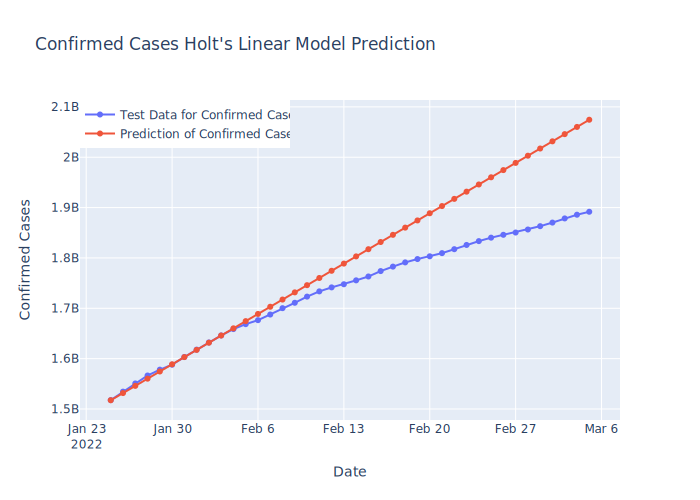

In [50]:
#Model's performance on test data

fig = go.Figure()
fig.add_trace(go.Scatter(x = model_test.index, y = model_test["Total_Cases"],
                    mode = 'lines + markers', name = "Test Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x = model_test.index, y = y_pred["Holt"],
                    mode = 'lines + markers', name = "Prediction of Confirmed Cases",))
fig.update_layout(title = "Confirmed Cases Holt's Linear Model Prediction",
                 xaxis_title = "Date", yaxis_title = "Confirmed Cases", legend = dict(x = 0, y = 1, traceorder = "normal"))
fig.show(renderer="svg")

In [51]:
#Creating a dataframe to compare the predictions of all the models

holt_new_date=[]
holt_new_prediction = []
for i in range(1,18):
    holt_new_date.append(date_wise.index[-1]+timedelta(days=i))
    holt_new_prediction.append(holt.forecast((len(model_test) + i))[-1])

model_predictions = pd.DataFrame(zip(holt_new_date),
                               columns = ["Dates"])

In [52]:
model_predictions["Holt's Linear Model Prediction"] = holt_new_prediction
model_predictions.head()

,Dates,Holt's Linear Model Prediction
0,2022-03-06,2.088723e+09
1,2022-03-07,2.103007e+09
2,2022-03-08,2.117291e+09
3,2022-03-09,2.131576e+09
4,2022-03-10,2.145860e+09


In [53]:
#Holt's Winter Model for Daily Time Series

In [54]:
#Performing exponential smoothing

es = ExponentialSmoothing(np.asarray(model_train['Total_Cases']),seasonal_periods = 14, trend = 'add', seasonal = 'mul').fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [56]:
#Root mean squared error for Holt's Winter Model

y_pred["Holt's Winter Model"] = es.forecast(len(model_test))
model_scores.append(np.sqrt(mean_squared_error(y_pred["Total_Cases"], y_pred["Holt's Winter Model"])))
print("Root Mean Square Error for Holt's Winter Model: ", np.sqrt(mean_squared_error(y_pred["Total_Cases"], y_pred["Holt's Winter Model"])))

Root Mean Square Error for Holt's Winter Model:  83803339.34291057


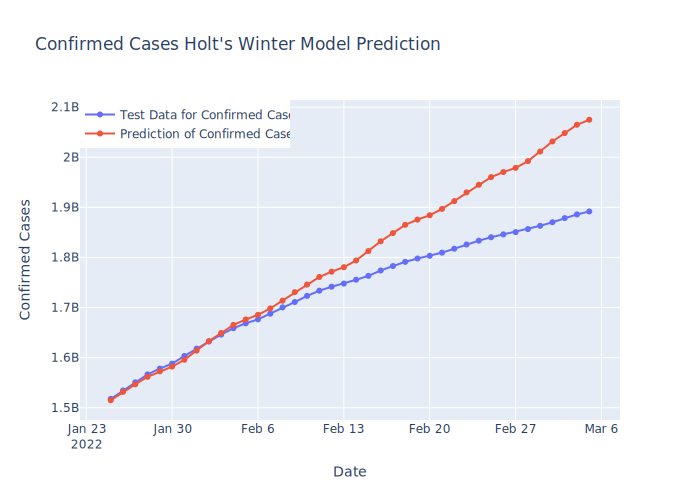

In [58]:
#Obtaining the predictions of the holt winter model using test data

fig = go.Figure()
fig.add_trace(go.Scatter(x = model_test.index, y = model_test["Total_Cases"],
                    mode = 'lines + markers', name = "Test Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x = model_test.index, y = y_pred["Holt\'s Winter Model"],
                    mode = 'lines + markers', name = "Prediction of Confirmed Cases",))
fig.update_layout(title = "Confirmed Cases Holt's Winter Model Prediction",
                 xaxis_title = "Date", yaxis_title = "Confirmed Cases", legend = dict(x = 0, y = 1, traceorder = "normal"))
fig.show(renderer="svg")

In [59]:
holt_winter_new_prediction = []
for i in range(1,18):
    holt_winter_new_prediction.append(es.forecast((len(model_test) + i))[-1])
model_predictions["Holt's Winter Model Prediction"] = holt_winter_new_prediction
model_predictions.head()

,Dates,Holt's Linear Model Prediction,Holt's Winter Model Prediction
0,2022-03-06,2.088723e+09,2.082933e+09
1,2022-03-07,2.103007e+09,2.095365e+09
2,2022-03-08,2.117291e+09,2.111142e+09
3,2022-03-09,2.131576e+09,2.128791e+09
4,2022-03-10,2.145860e+09,2.144201e+09
